### 1. 데이터 로드 및 전처리

In [1]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 


In [2]:
data = pd.read_csv('./data/oes_sample_data.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,24.27,29.14,26.06,24.60,23.08,20.36,20.26,20.58,20.45,20.16,...,94.26,75.33,52.11,30.66,17.53,14.22,13.69,14.54,16.91,20.77
1,27.89,33.18,29.90,27.55,25.30,24.68,23.35,23.25,22.99,23.55,...,115.09,92.55,63.91,38.07,21.46,17.80,16.70,17.40,21.22,25.20
2,27.67,32.44,30.76,28.32,25.64,23.71,23.13,23.22,22.80,23.26,...,114.18,90.71,63.31,37.48,21.25,16.89,16.09,17.37,20.21,25.49
3,27.39,32.67,29.36,27.63,25.37,23.90,23.42,22.57,23.34,23.52,...,111.01,89.17,61.64,36.64,20.71,16.64,15.92,17.24,19.77,24.30
4,27.18,32.80,29.92,27.29,25.45,23.58,22.65,22.63,23.56,23.11,...,108.76,87.26,61.30,35.51,20.69,16.73,15.88,16.84,19.91,23.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.73,55.83,124.53,238.41,291.94,234.17,140.22,66.86,40.85,65.25,...,10.31,10.45,10.68,11.33,12.18,11.82,12.98,12.81,12.91,13.01
246,42.81,56.84,125.32,239.68,292.03,235.06,139.29,67.77,41.70,65.38,...,10.31,10.31,10.83,11.27,12.01,12.34,13.05,12.71,13.58,13.23
247,43.79,56.85,126.46,239.21,295.14,234.10,139.30,66.51,41.09,65.32,...,10.24,10.34,10.68,11.35,11.59,12.52,12.63,13.06,13.06,13.23
248,43.46,55.90,125.64,239.25,296.02,235.10,138.75,66.68,40.66,65.86,...,10.18,10.58,10.60,11.36,11.98,12.56,12.89,13.28,13.70,13.17


### 2. K-means 클러스터링 적용 및 t-sne 시각화
- t-sne 알고리즘 특성상 perplexity에 따라 시각화 결과가 달라짐

In [3]:
df = data.T

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# 결과 확인
result_by_sklearn = df.copy()
result_by_sklearn["cluster"] = kmeans.labels_

In [4]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3,perplexity = 10).fit_transform(df)
X_embedded.shape

df.reset_index(drop = True, inplace =True)
result_by_sklearn.reset_index(drop = True, inplace =True)

plot_df = pd.DataFrame(X_embedded)
plot_df['label'] = result_by_sklearn["cluster"]
plot_df

,0,1,2,label
0,13.960894,0.760284,8.269182,3
1,9.552820,-1.698842,15.272293,3
2,-20.868099,-4.031887,-3.184446,0
3,-6.792634,2.442976,-19.397284,4
4,-2.519036,5.657144,-23.475269,4
...,...,...,...,...
1019,4.554106,-3.903454,-4.663088,3
1020,4.810812,-4.478344,-4.484689,3
1021,5.012163,-4.636704,-4.124211,3
1022,5.354286,-4.190533,-2.834148,3


<ipython-input-5-9e88a0ba4249>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


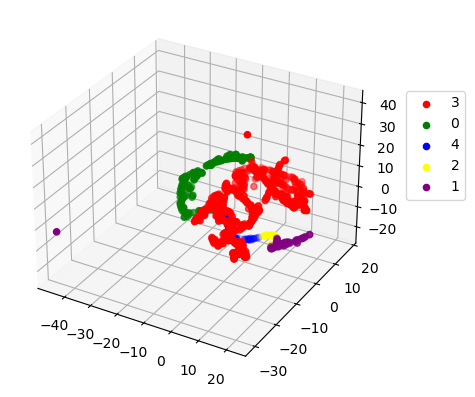

In [5]:
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import pyplot as plt
cmap= ListedColormap(sns.color_palette('husl',256).as_hex())
cmap = ['red','green','blue','yellow','purple','black','gray']
fig = plt.figure()
ax = fig.gca(projection ='3d')

X = X_embedded[:,0]
Y = X_embedded[:,1]
Z = X_embedded[:,2]

cols = list(result_by_sklearn["cluster"].unique())
for i in range(len(cols)):
    col_index = df[result_by_sklearn["cluster"] == cols[i]].index
    ax.scatter(X[col_index],Y[col_index],Z[col_index],c=cmap[i],label= cols[i])
#plt.title("3-D plot with t-sne")
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 0.8))
plt.show()